# [#30DaysOfDataViz](http://www.30daysofdataviz.com/) - Day 4 - Violin Plot Rideshare Data

In [93]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
directory = r'data/'
df_ = pd.DataFrame()

for filename in os.listdir(directory):
    if "uber-raw-data-" in filename:
        df_ = df_.append(pd.read_csv(directory + filename))
        print(os.path.join(directory, filename))
    else:
        continue
        
df_.rename({'Date/Time': "date"}, axis=1, inplace=True)
# df_ = df_.groupby('date')['Base'].count().reset_index()
df_['date'] = pd.to_datetime(df_['date'])
df_.rename({"Base" : 'rides'}, axis=1, inplace=True)

data/uber-raw-data-apr14.csv
data/uber-raw-data-aug14.csv
data/uber-raw-data-sep14.csv
data/uber-raw-data-jul14.csv
data/uber-raw-data-jun14.csv
data/uber-raw-data-may14.csv


In [59]:
dm = {0:"Mon", 1:"Tues", 2:"Wed", 3:"Thurs", 4:"Fri", 5:"Sat", 6:"Sun"}

df = df_.copy()

df['hour'] = df['date'].dt.hour
df['dow'] = df['date'].dt.dayofweek
df['day'] = df['dow'].apply(lambda x: dm[x])
df['north'] = (df['Lat']>= 40.742500).astype(int)

df = df.sample(50000)

In [61]:
df.head()

,date,Lat,Lon,rides,hour,dow,day,north
271672,2014-05-29 11:51:00,40.7893,-73.9756,B02598,11,3,Thurs,1
112875,2014-07-12 01:17:00,40.7305,-74.0045,B02598,1,5,Sat,0
322548,2014-04-30 13:55:00,40.7512,-73.9940,B02617,13,2,Wed,1
381570,2014-04-07 18:16:00,40.7447,-73.9913,B02682,18,0,Mon,1
746718,2014-07-25 17:44:00,40.7325,-73.9952,B02682,17,4,Fri,0


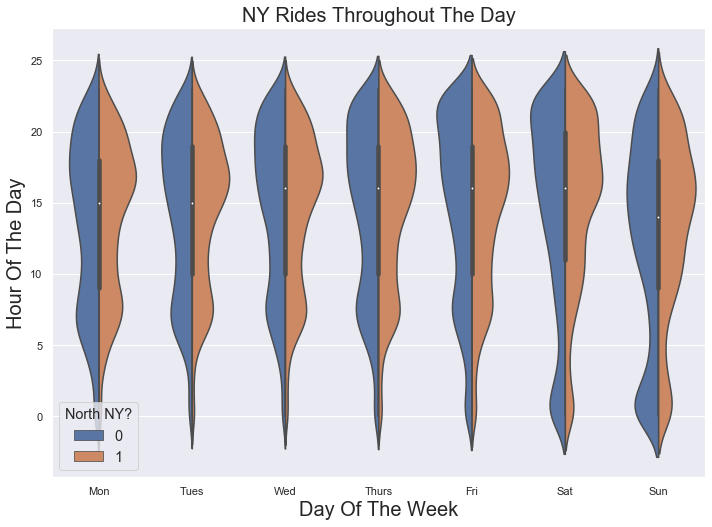

In [114]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.violinplot(data=df, x='day', y='hour', hue='north', split=True,
                   order=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'],
                   legend = False)
ax.set_title("NY Rides Throughout The Day", fontsize=20)
ax.set_xlabel("Day Of The Week",fontsize=20)
ax.set_ylabel("Hour Of The Day",fontsize=20)
ax.legend(loc='lower left', title="North NY?", fontsize='large', title_fontsize='large');